Code pour trouver une combinaison de méthodes de classification du retard

In [23]:
import data_viz
import preprocessor
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
project_path = r"/Users/loucamalerba/Desktop/IMPORTANT/CentraleSupelec/Cours 2A/Machine Learning Casa/Projet_ML_Casa/"
ORY_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_ORY.csv"
ORY_df = preprocessor.make_df(ORY_dataset_path)
BVA_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_BVA.csv"
BVA_df = preprocessor.make_df(BVA_dataset_path)
CDG_dataset_path = project_path + r"make_dataset/flights_history_last_12_months_CDG.csv"
CDG_df = preprocessor.make_df(CDG_dataset_path)
dataset_df = pd.concat([ORY_df, BVA_df, CDG_df])
dataset_df

,Flight Number,Airline Name,Airline IATA Code,Airline ICAO Code,Departure Airport IATA,Departure Airport ICAO,Departure Terminal,Departure Gate,Scheduled Departure Time,Estimated Departure Time,Actual Departure Time,Arrival Airport IATA,Arrival Airport ICAO,Scheduled Arrival Time,Estimated Arrival Time,Flight Status
0,hv3810,transavia,hv,tra,ory,lfpo,orly,e04,2024-04-15t06:00:00.000,2024-04-15t06:10:00.000,2024-04-15t06:09:00.000,pmo,licj,2024-04-15t08:25:00.000,2024-04-15t08:09:00.000,active
1,hv4200,transavia,hv,tra,ory,lfpo,orly,e03,2024-04-15t06:00:00.000,2024-04-15t06:12:00.000,2024-04-15t06:06:00.000,dbv,lddu,2024-04-15t08:25:00.000,2024-04-15t08:00:00.000,active
2,dx4750,danish air,dx,dtr,ory,lfpo,orly,e07,2024-04-15t06:00:00.000,2024-04-15t06:14:00.000,2024-04-15t06:32:00.000,bcn,lebl,2024-04-15t07:40:00.000,2024-04-15t07:54:00.000,active
3,u24803,easyjet,u2,ezy,ory,lfpo,1,NaN,2024-04-15t06:00:00.000,2024-04-15t06:06:00.000,2024-04-15t06:02:00.000,psa,lirp,2024-04-15t07:35:00.000,2024-04-15t07:22:00.000,active
4,ed3530,air explore,ed,axe,ory,lfpo,orly,e6c,2024-04-15t06:05:00.000,2024-04-15t06:24:00.000,2024-04-15t06:45:00.000,chq,lgsa,2024-04-15t10:30:00.000,2024-04-15t10:49:00.000,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890233,tk6078,turkish airlines,tk,thy,cdg,lfpg,NaN,NaN,2025-04-11t19:40:00.000,2025-04-11t19:53:00.000,2025-04-11t20:01:00.000,ist,ltfm,2025-04-11t23:42:00.000,2025-04-11t23:52:00.000,active
890234,fx97,fedex,fx,fdx,cdg,lfpg,NaN,NaN,2025-04-11t22:00:00.000,2025-04-11t22:15:00.000,2025-04-11t22:16:00.000,lgg,eblg,2025-04-11t22:50:00.000,2025-04-11t22:47:00.000,active
890235,fx5217,fedex,fx,fdx,cdg,lfpg,NaN,NaN,2025-04-11t22:18:00.000,2025-04-11t22:18:00.000,2025-04-11t22:14:00.000,mem,kmem,2025-04-12t00:32:00.000,2025-04-12t00:39:00.000,active
890236,d07334,dhl air,d0,dhk,cdg,lfpg,NaN,NaN,2025-04-11t23:35:00.000,2025-04-11t23:50:00.000,2025-04-11t23:48:00.000,mxp,limc,2025-04-12t01:05:00.000,2025-04-12t00:47:00.000,active


In [25]:
args = {
    "del_nan_airlines": True,
    "Unwanted_airlines": ["fx", "d0", "5x", "mb", "2c", "cao", "go", "nan", "f5", "hq", "fx", "d0", "5x", "mb", "2c", "cao", "go", "nan", "f5", "hq", "se", "c0", "4s", "m2", "iv", "fj", "z7", "wi", "pg", "p4", "te", "m6", "qy", "zq", "mi", "h3", "un", "p8", "wg", "1i", "si", "vj", "xc", "ec", "sr", "5y", "za", "f4", "zt", "dk", "bvl", "1t", "ia", "en", "ll", "dn", "mr", "ee", "6h", "h4", "d8", "xm", "mj", "6g", "ht", "lz", "b9", "np", "cc", "ur", "iz", "ql", "dc", "al", "ti", "rk", "tb", "2w", "vl", "rm", "lw", "lz", "yd", "ft", "wk", "pu", "4d", "6k", "g2", "ap", "ed", "7w", "no", "jp", "3o", "w4", "re", "pk", "eb", "ne", "p6", "wx", "xg", "2n", "d4", "fh", "a2", "ir", "au", "e4", "3f", "vr", "c3", "pq", "5h", "sb", "kk", "gr", "i2", "hy", "e9", "f6", "4o", "yu", "9t", "2f", "ov", "6y", "abb", "md", "sm", "dx", "j2", "tw", "mt", "x9", "a5", "3e", "t7", "2l", "7a", "ls", "8s", "a9", "t3", "ku", "rr", "tn", "hc", "h7", "5f", "mw", "ob", "br", "tg", "ew", "bu", "n0", "uk", "g2t", "3v", "5k", "b0", "xq", "xy", "sf", "vf", "gq", "dj", "av", "k6", "hu", "hn", "ms", "wt", "ca", "g9", "to", "km", "pr"],
    "grouped": True,
    "drop_unknown_status": True,
    "keep_values_ADTNan_EDT_over_x_minutes": 60
}
preprocessed_dataset = preprocessor.preprocess_dataset(dataset_df, **args)
preprocessed_dataset

Processing Groups:  78%|███████▊  | 262675/335332 [01:11<00:19, 3671.60it/s]


,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status
0,2024-04-15 05:45:00,11,mad,"[vy5095, ib3431]","[vy, ib]",cdg,3,2024-04-15 05:39:00,2024-04-15 05:52:00,2024-04-15 07:55:00,2024-04-15 07:30:00,active
1,2024-04-15 06:00:00,e03,dbv,[hv4200],[hv],ory,orly,2024-04-15 06:12:00,2024-04-15 06:06:00,2024-04-15 08:25:00,2024-04-15 08:00:00,active
2,2024-04-15 06:00:00,e04,pmo,[hv3810],[hv],ory,orly,2024-04-15 06:10:00,2024-04-15 06:09:00,2024-04-15 08:25:00,2024-04-15 08:09:00,active
3,2024-04-15 06:10:00,b18,lis,"[ad7350, s48933, tp441]","[ad, s4, tp]",ory,orly,2024-04-15 05:55:00,2024-04-15 06:17:00,2024-04-15 07:40:00,2024-04-15 07:28:00,active
4,2024-04-15 06:10:00,d66,fco,"[dl6666, ey3012, fb1712, mf9573, az317]","[dl, ey, fb, mf, az]",cdg,2b,2024-04-15 06:15:00,2024-04-15 06:17:00,2024-04-15 08:10:00,2024-04-15 07:54:00,active
...,...,...,...,...,...,...,...,...,...,...,...,...
262670,2025-04-11 23:20:00,e03,scl,"[kl2258, af406]","[kl, af]",cdg,2e,2025-04-11 23:46:00,2025-04-12 00:01:00,2025-04-12 07:45:00,2025-04-12 07:52:00,active
262671,2025-04-11 23:20:00,l44,mnl,"[kl2146, af224]","[kl, af]",cdg,2e,2025-04-12 00:31:00,NaT,2025-04-12 18:30:00,NaT,active
262672,2025-04-11 23:25:00,e03,gru,"[kl2415, mu1651, sk9959, af454]","[kl, mu, sk, af]",cdg,2e,2025-04-11 23:22:00,2025-04-11 23:36:00,2025-04-12 06:15:00,2025-04-12 05:55:00,active
262673,2025-04-11 23:25:00,e04,orn,[af1430],[af],cdg,2e,2025-04-11 23:35:00,2025-04-11 23:46:00,2025-04-12 01:05:00,2025-04-12 00:55:00,active


In [26]:
preprocessed_dataset[(~preprocessed_dataset["Estimated Departure Time"].isna()) & (preprocessed_dataset["Actual Departure Time"].isna())]

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status
65,2024-04-15 07:45:00,5,alg,"[x1109, ag271]","[x1, ag]",cdg,3,2024-04-15 08:02:00,NaT,2024-04-15 09:10:00,NaT,active
70,2024-04-15 07:55:00,b29,lhr,"[aa6745, ba305]","[aa, ba]",cdg,2d,2024-04-15 08:11:00,NaT,2024-04-15 08:15:00,NaT,active
85,2024-04-15 08:30:00,g35,haj,"[am5746, dl8647, ey5969, mk9170, uu8338, af1338]","[am, dl, ey, mk, uu, af]",cdg,2g,2024-04-15 09:16:00,NaT,2024-04-15 10:00:00,NaT,active
103,2024-04-15 09:00:00,63,muc,"[a31449, nh6020, sq2237, ua9207, lh2227]","[a3, nh, sq, ua, lh]",cdg,1,2024-04-15 09:40:00,NaT,2024-04-15 10:30:00,NaT,active
113,2024-04-15 09:05:00,a21,aur,"[af7022, ce1502]","[af, ce]",ory,orly,2024-04-15 09:12:00,NaT,2024-04-15 10:25:00,NaT,active
...,...,...,...,...,...,...,...,...,...,...,...,...
262648,2025-04-11 21:50:00,b28,edi,[u23244],[u2],cdg,2b,2025-04-11 23:06:00,NaT,2025-04-11 22:35:00,NaT,active
262656,2025-04-11 21:55:00,f05,bod,"[am5794, ay6303, az2614, bt5613, mu1733, sk973...","[am, ay, az, bt, mu, sk, af]",cdg,2f,2025-04-11 22:30:00,NaT,2025-04-11 23:10:00,NaT,active
262664,2025-04-11 22:15:00,d51,ath,"[sk8499, v75017, a3615]","[sk, v7, a3]",cdg,2d,2025-04-11 22:15:00,NaT,2025-04-12 02:20:00,NaT,active
262665,2025-04-11 22:25:00,b29,brs,[u22778],[u2],cdg,2b,2025-04-12 00:01:00,NaT,2025-04-11 22:45:00,NaT,active


In [27]:
preprocessed_dataset[~(~preprocessed_dataset["Actual Departure Time"].isna() | ((~preprocessed_dataset["Estimated Departure Time"].isna()) & (preprocessed_dataset["Actual Departure Time"].isna())) | (preprocessed_dataset["Flight Status"] == "cancelled") | (preprocessed_dataset["Departure Terminal"]).isna())][-20:]

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status
163823,2024-11-13 21:55:00,f05,ath,[af1032],[af],cdg,2f,NaT,NaT,2024-11-14 02:10:00,NaT,active
163824,2024-11-13 22:00:00,e05,dub,[af1016],[af],cdg,2e,NaT,NaT,2024-11-13 22:50:00,NaT,active
163827,2024-11-13 22:05:00,e04,lad,[af972],[af],cdg,2e,NaT,NaT,2024-11-14 06:55:00,NaT,active
167917,2024-11-20 14:35:00,34,nce,[af6222],[af],ory,3,NaT,NaT,2024-11-20 16:00:00,NaT,active
168824,2024-11-22 09:05:00,a21,aur,"[af7022, ce1502]","[af, ce]",ory,1,NaT,NaT,2024-11-22 10:25:00,NaT,active
183564,2024-12-16 08:35:00,f3b,nce,"[am5959, dl8289, ey5907, g35050, kq3092, mu151...","[am, dl, ey, g3, kq, mu, vn, af]",cdg,2f,NaT,NaT,2024-12-16 10:10:00,NaT,active
193986,2024-12-31 09:30:00,f3b,nce,"[am5799, dl8398, ey5978, g35044, mk9084, mu186...","[am, dl, ey, g3, mk, mu, sv, vn, af]",cdg,2f,NaT,NaT,2024-12-31 11:05:00,NaT,active
212884,2025-01-30 15:45:00,f3b,nce,"[am5861, ay6305, dl8587, ey5914, g35045, mk914...","[am, ay, dl, ey, g3, mk, sv, ws, af]",cdg,2f,NaT,NaT,2025-01-30 17:20:00,NaT,active
215109,2025-02-03 09:05:00,a03,aur,"[af7022, ce1502]","[af, ce]",ory,1,NaT,NaT,2025-02-03 10:25:00,NaT,active
216691,2025-02-05 20:05:00,a20,aur,"[af7020, ce1506]","[af, ce]",ory,1,NaT,NaT,2025-02-05 21:25:00,NaT,active


In [28]:
final_dataset_ADT = preprocessed_dataset[~preprocessed_dataset["Actual Departure Time"].isna()]
final_dataset_ADT["Delay"] = (final_dataset_ADT["Actual Departure Time"] - final_dataset_ADT["Scheduled Departure Time"]).dt.total_seconds() / 60
final_dataset_ADT

/var/folders/0f/_m882q4510j6hp59n90vxvzm0000gn/T/ipykernel_34668/70299816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_ADT["Delay"] = (final_dataset_ADT["Actual Departure Time"] - final_dataset_ADT["Scheduled Departure Time"]).dt.total_seconds() / 60


,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status,Delay
0,2024-04-15 05:45:00,11,mad,"[vy5095, ib3431]","[vy, ib]",cdg,3,2024-04-15 05:39:00,2024-04-15 05:52:00,2024-04-15 07:55:00,2024-04-15 07:30:00,active,7.0
1,2024-04-15 06:00:00,e03,dbv,[hv4200],[hv],ory,orly,2024-04-15 06:12:00,2024-04-15 06:06:00,2024-04-15 08:25:00,2024-04-15 08:00:00,active,6.0
2,2024-04-15 06:00:00,e04,pmo,[hv3810],[hv],ory,orly,2024-04-15 06:10:00,2024-04-15 06:09:00,2024-04-15 08:25:00,2024-04-15 08:09:00,active,9.0
3,2024-04-15 06:10:00,b18,lis,"[ad7350, s48933, tp441]","[ad, s4, tp]",ory,orly,2024-04-15 05:55:00,2024-04-15 06:17:00,2024-04-15 07:40:00,2024-04-15 07:28:00,active,7.0
4,2024-04-15 06:10:00,d66,fco,"[dl6666, ey3012, fb1712, mf9573, az317]","[dl, ey, fb, mf, az]",cdg,2b,2024-04-15 06:15:00,2024-04-15 06:17:00,2024-04-15 08:10:00,2024-04-15 07:54:00,active,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262669,2025-04-11 23:20:00,e03,hkg,"[kl2156, qf4224, af188]","[kl, qf, af]",cdg,2e,2025-04-12 00:15:00,2025-04-12 00:13:00,2025-04-12 17:30:00,2025-04-12 17:46:00,active,53.0
262670,2025-04-11 23:20:00,e03,scl,"[kl2258, af406]","[kl, af]",cdg,2e,2025-04-11 23:46:00,2025-04-12 00:01:00,2025-04-12 07:45:00,2025-04-12 07:52:00,active,41.0
262672,2025-04-11 23:25:00,e03,gru,"[kl2415, mu1651, sk9959, af454]","[kl, mu, sk, af]",cdg,2e,2025-04-11 23:22:00,2025-04-11 23:36:00,2025-04-12 06:15:00,2025-04-12 05:55:00,active,11.0
262673,2025-04-11 23:25:00,e04,orn,[af1430],[af],cdg,2e,2025-04-11 23:35:00,2025-04-11 23:46:00,2025-04-12 01:05:00,2025-04-12 00:55:00,active,21.0


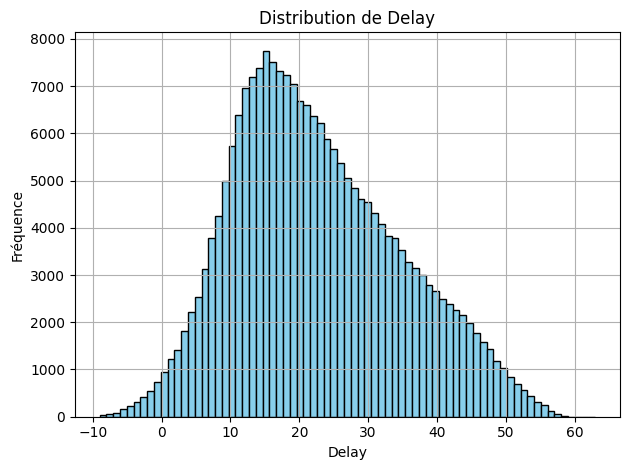

In [29]:
data_viz.make_column_hist(final_dataset_ADT[(final_dataset_ADT["Delay"] > -10) & (final_dataset_ADT["Delay"] < 65)], "Delay", bins=73)

In [30]:
final_dataset_EDT = preprocessed_dataset[(preprocessed_dataset["Actual Departure Time"].isna()) & (~preprocessed_dataset["Estimated Departure Time"].isna())].copy()
final_dataset_EDT["Delay"] = (final_dataset_EDT["Estimated Departure Time"] - final_dataset_EDT["Scheduled Departure Time"]).dt.total_seconds() / 60
final_dataset_EDT[["Flight Number", "Scheduled Departure Time", "Estimated Departure Time", "Delay"]][-60:]

,Flight Number,Scheduled Departure Time,Estimated Departure Time,Delay
262262,"[dl8606, kl2227, vs6608, af32]",2025-04-11 14:00:00,2025-04-11 16:02:00,122.0
262264,"[ac5728, sk8419, v75001, a3617]",2025-04-11 14:05:00,2025-04-11 14:42:00,37.0
262273,[ah1087],2025-04-11 14:10:00,2025-04-11 15:42:00,92.0
262282,"[aa7216, mh9669, qr5887, ba315]",2025-04-11 14:25:00,2025-04-11 15:21:00,56.0
262291,"[ad7200, s48923, tp433]",2025-04-11 14:40:00,2025-04-11 15:01:00,21.0
262295,"[ar7833, dl8334, g35260, mk9566, sq1860, ux222...",2025-04-11 14:40:00,2025-04-11 15:39:00,59.0
262298,[hv4708],2025-04-11 14:50:00,2025-04-11 15:05:00,15.0
262300,"[la8790, bt639]",2025-04-11 14:55:00,2025-04-11 16:09:00,74.0
262318,[u24869],2025-04-11 15:10:00,2025-04-11 15:54:00,44.0
262319,"[kl2244, af816]",2025-04-11 15:10:00,2025-04-11 16:10:00,60.0


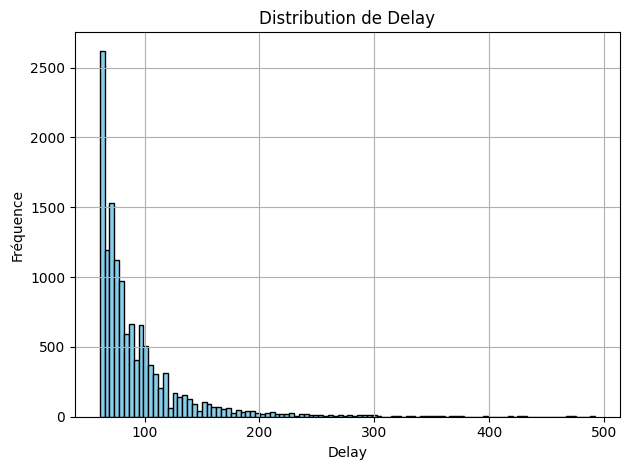

In [31]:
data_viz.make_column_hist(final_dataset_EDT[(final_dataset_EDT["Delay"] > 60) & (final_dataset_EDT["Delay"] < 500)], "Delay", bins=102)

Mise en place d'une loi de distribution des retards réels vs retards estimés dans le cas ADTNan et EDT:

,Scheduled DT,EDelay,RDelay,R-E
0,2025-04-11 23:20:00,71.0,80.0,9.0
1,2025-04-11 22:25:00,96.0,20.0,-76.0
2,2025-04-11 21:55:00,35.0,60.0,25.0
3,2025-04-11 21:50:00,76.0,85.0,9.0
4,2025-04-11 21:30:00,35.0,43.0,8.0
5,2025-04-11 21:30:00,8.0,80.0,72.0
6,2025-04-11 21:20:00,48.0,66.0,18.0
7,2025-04-11 21:15:00,51.0,171.0,120.0
8,2025-04-11 21:10:00,50.0,66.0,16.0
9,2025-04-11 21:10:00,55.0,65.0,10.0


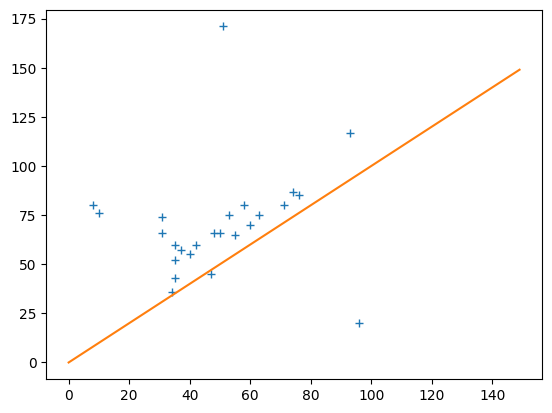

In [32]:
data = pd.read_csv(project_path + r"data_viz/notes_estimated_vs_real_delay.csv")
data["RDelay"] = data["RDelay"].astype(float)
data["EDelay"] = data["EDelay"].astype(float)
data["R-E"] = data["RDelay"] - data["EDelay"]
plt.plot(data["EDelay"], data["RDelay"], "+")
plt.plot([k for k in range(0, 150)], [k for k in range(0, 150)])
data

Coefficient : 0.1901552546091213
Ordonnée à l'origine : 61.061542842678136


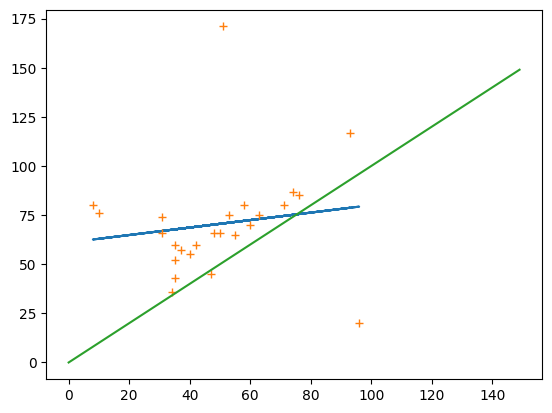

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Données d'exemple
X = np.array(data["EDelay"]).reshape(-1, 1)
y = np.array(data["RDelay"])

# Création du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X, y)

# Prédiction
y_pred = model.predict(X)

# Affichage des coefficients
print(f"Coefficient : {model.coef_[0]}")
print(f"Ordonnée à l'origine : {model.intercept_}")
plt.plot(X, y_pred)
plt.plot(X, y, "+")
plt.plot([k for k in range(0, 150)], [k for k in range(0, 150)])

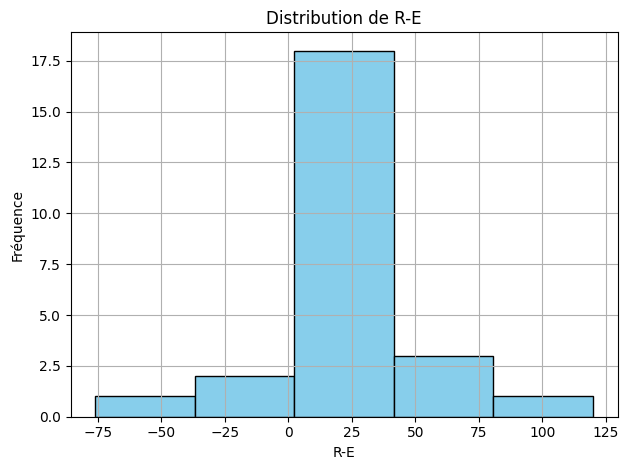

In [34]:
data_viz.make_column_hist(data, "R-E", bins=5)


In [35]:
final_dataset_noADT_noEDT = preprocessed_dataset[(preprocessed_dataset["Actual Departure Time"].isna()) & (preprocessed_dataset["Estimated Departure Time"].isna())].copy()
final_dataset_noADT_noEDT

,Scheduled Departure Time,Departure Gate,Arrival Airport IATA,Flight Number,Airline IATA Code,Departure Airport IATA,Departure Terminal,Estimated Departure Time,Actual Departure Time,Scheduled Arrival Time,Estimated Arrival Time,Flight Status
57,2024-04-15 07:35:00,e05,lhr,"[am5976, dl8718, kq3218, mk9412, uu8680, vs670...","[am, dl, kq, mk, uu, vs, af]",cdg,2e,NaT,NaT,2024-04-15 08:00:00,NaT,cancelled
310,2024-04-15 12:15:00,f05,ams,"[am5925, dl8537, g35010, ga9543, kl2012, mk939...","[am, dl, g3, ga, kl, mk, af]",cdg,2f,NaT,NaT,2024-04-15 13:40:00,NaT,cancelled
429,2024-04-15 14:30:00,f05,ams,"[am6165, dl8459, kl2439, ws5013, af1840]","[am, dl, kl, ws, af]",cdg,2f,NaT,NaT,2024-04-15 15:55:00,NaT,cancelled
826,2024-04-16 07:00:00,c16,tls,[af6100],[af],ory,3,NaT,NaT,2024-04-16 08:15:00,NaT,cancelled
829,2024-04-16 07:00:00,f3b,nce,"[ey6044, af7300]","[ey, af]",cdg,2f,NaT,NaT,2024-04-16 08:30:00,NaT,cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...
260457,2025-04-09 12:25:00,e12,lbv,"[dl8186, kl2392, af926]","[dl, kl, af]",cdg,2e,NaT,NaT,2025-04-09 19:00:00,NaT,cancelled
260487,2025-04-09 12:50:00,f05,ath,"[dl8756, ws5000, af1832]","[dl, ws, af]",cdg,2f,NaT,NaT,2025-04-09 17:05:00,NaT,cancelled
261164,2025-04-10 10:10:00,f05,nce,"[am6050, bt5603, dl8765, kq3092, mk9082, af7316]","[am, bt, dl, kq, mk, af]",cdg,2f,NaT,NaT,2025-04-10 11:45:00,NaT,cancelled
261189,2025-04-10 10:30:00,e08,yul,"[dl8373, kl2040, me4342, vs6822, af342]","[dl, kl, me, vs, af]",cdg,2e,NaT,NaT,2025-04-10 12:05:00,NaT,cancelled
